# Statistics

In [82]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

In [83]:
df=pd.read_csv('weight-height.csv')

In [84]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<AxesSubplot:xlabel='Weight', ylabel='Count'>

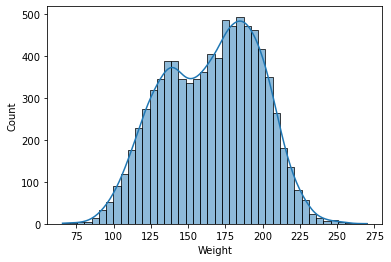

In [85]:
sns.histplot(df['Weight'],kde=True)

<AxesSubplot:xlabel='Height', ylabel='Count'>

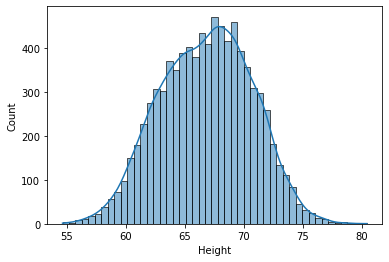

In [86]:
sns.histplot(df['Height'],kde=True)

# Remove Outliers

In [87]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [88]:
df['Height'].mean()

66.80992512908925

In [89]:
df['Height'].std()

3.8514544315772765

In [90]:
66.80992512908925-(3*3.8514544315772765)

55.25556183435742

In [91]:
66.80992512908925+(3*3.8514544315772765)

78.36428842382108

In [92]:
df[df.Height<55.25556183435742]

,Gender,Height,Weight
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
7617,Female,55.148557,88.812412


In [93]:
df[df.Height>78.36428842382108]

,Gender,Height,Weight
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989698
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6328,Female,80.450000,178.020675


In [94]:
new_df=df[(df.Height>55.25556183435742)&(df.Height<78.36428842382108)]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


<AxesSubplot:xlabel='Height', ylabel='Count'>

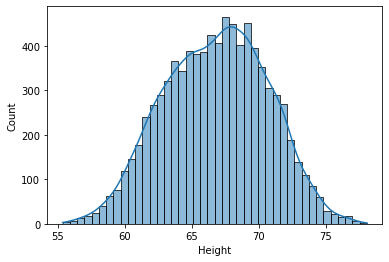

In [95]:
sns.histplot(new_df['Height'],kde=True)

# Z SCORE

In [96]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [97]:
df['zscores']=(df.Height-df.Height.mean())/df.Height.std()

In [98]:
df.head()

,Gender,Height,Weight,zscores
0,Male,73.847017,241.893563,1.827126
1,Male,68.781904,162.310473,0.512009
2,Male,74.110105,212.740856,1.895435
3,Male,71.730978,220.042470,1.277713
4,Male,69.881796,206.349801,0.797587


In [99]:
df.zscores.min()

-3.1658344959558185

In [100]:
df.zscores.max()

3.5415386870680865

In [101]:
df[df.zscores>3]

,Gender,Height,Weight,zscores
1317,Male,78.462053,227.342565,3.025384
2014,Male,78.998742,269.989698,3.164731
3285,Male,78.528210,253.889004,3.042561
3757,Male,78.621374,245.733783,3.066750
6328,Female,80.450000,178.020675,3.541539


In [102]:
df[df.zscores<-3]

,Gender,Height,Weight,zscores
6624,Female,54.616858,71.393749,-3.165834
7294,Female,54.873728,78.606670,-3.099140
7617,Female,55.148557,88.812412,-3.027783


# Z SCORE ALGORITHM

In [103]:
from sklearn.preprocessing import StandardScaler as sds

In [104]:
sts=sds()

In [105]:
df['ZC']=sts.fit_transform(df[['Height']])

In [106]:
df.head()

,Gender,Height,Weight,zscores,ZC
0,Male,73.847017,241.893563,1.827126,1.827233
1,Male,68.781904,162.310473,0.512009,0.512039
2,Male,74.110105,212.740856,1.895435,1.895545
3,Male,71.730978,220.042470,1.277713,1.277788
4,Male,69.881796,206.349801,0.797587,0.797634


In [107]:
df.ZC.min()

-3.1660195404950504

In [108]:
df.ZC.max()

3.541745691696743

In [109]:
df[df.ZC<-3]

,Gender,Height,Weight,zscores,ZC
6624,Female,54.616858,71.393749,-3.165834,-3.166020
7294,Female,54.873728,78.606670,-3.099140,-3.099321
7617,Female,55.148557,88.812412,-3.027783,-3.027960


In [110]:
df[df.ZC>3]

,Gender,Height,Weight,zscores,ZC
1317,Male,78.462053,227.342565,3.025384,3.025561
2014,Male,78.998742,269.989698,3.164731,3.164916
3285,Male,78.528210,253.889004,3.042561,3.042739
3757,Male,78.621374,245.733783,3.066750,3.066930
6328,Female,80.450000,178.020675,3.541539,3.541746
